[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JuiXnrL99eZzIiRzdtREyLlCYhF6Nc4u?usp=sharing)

# PERFORMANCE EVALUATION AND HYPERPARAMETER TUNING

 In this Notebook, we will learn 3 things:   
*  Evaluation metrics
*  Cross Validation
*  Hyperparameter Tuning 

# 1. Evaluation Metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1.1 Classification Metrics

**Importing the dataset**

In [ ]:
diabetes = pd.read_csv("diabetes.txt", header=None)

**This dataset contains 13 columns and based on different features, it is guessed whether or not a person has Diabetes**

<blockquote> 0 = No Diabetes  <br>
1 = Diabetes</blockquote>

 For Each Attribute: (all numeric-valued)
 <blockquote>
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
   </blockquote>

In [ ]:
diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Split into training and testing (80:20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes.iloc[:, :-1], diabetes.iloc[:,-1], test_size=0.2, random_state=3)

**Note for learners:** Here we have used MLPClassifier from neural_network module of sklearn library. MLP Classifier is also a classification algorithm like logistic regression or decision tree. We will soon learn about Neural Networks and Artificial Neural Networks in the upcoming sessions. So, no need to worry about it. 

### Developing a model and checking it's performance

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

## Performance Evaluation

**All performance metrics in sklearn are to be written in the same way -**  
> ``` metric_function(true_label, predicted_labels) ```

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 34
True Negative 67
False Positive 25
False Negative 28


### Accuracy
\begin{align}
Accuracy = \frac{TP+TN}{TP+TN+FN+FP}
\end{align}

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.6558441558441559

### Recall (Sensitivity)
\begin{align}
Sensitivity = \frac{TP}{TP+FN}
\end{align}

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, y_pred)

0.5483870967741935

### Specificity
sklearn does not have an inbuild function for Specificity. But by adding parameter pos_label =0 to the recall function, we treat that as the positive class, and hence gives the correct output
\begin{align}
Specificity = \frac{TN}{TN+FP}
\end{align}

In [ ]:
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))

Specificity with recall pos label=0:  0.7282608695652174


**Checking with formulas (tn , fp from confusion matrix):**

In [ ]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.7282608695652174


They are the same! You can use either one of them!

### Precision
\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.576271186440678

### Imbalanced Datasets

In [ ]:
diabetes.iloc[:,-1].value_counts()

0    500
1    268
Name: 8, dtype: int64

### Matthews Correlation Coefficient
\begin{align}
MCC = \frac{(TP*TN)-(FP*FN)}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
\end{align}

In [ ]:
from sklearn.metrics import matthews_corrcoef
print("MCC Score: ",matthews_corrcoef(y_test, y_pred))

MCC Score:  0.27908046118474855


### F1 Score
It is the harmonic mean of Precision and recall

\begin{align}
Precision = \frac{2*Precision*Recall}{Precision+Recall}
\end{align}

In [ ]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.5619834710743801


## Area Under the Curve (Reciever Operating Characterstics)

In [ ]:
from sklearn.metrics import plot_roc_curve

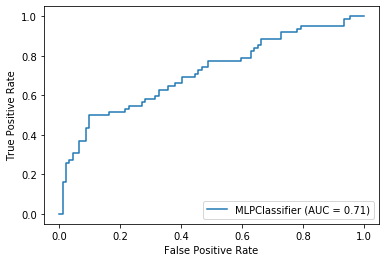

In [ ]:
plot_roc_curve(mlp, x_test, y_test)
plt.show()

## 1.2 Regression Metrics 

Wine Dataset  
    <b> Predictor Variable: </b> Quality (Tells quality of wine)

In [ ]:
wine = pd.read_csv("winequality.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Split into training and testing (80:20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.iloc[:, :-1], wine.iloc[:,-1], test_size=0.2, random_state=3)

Creating a model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred[:10]

array([5.44455619, 5.57868309, 5.99091469, 5.19864346, 6.0666099 ,
       5.01639077, 5.68416174, 6.26611011, 5.97010538, 5.65519351])

## Performance Measurement

Let y = Actual Value,  $\tilde{y}$ = Predicted Value

### Mean Absolute Error  
*  MAE is the absolute difference between the target value and the value predicted by the model.  
*  The MAE is more robust to outliers and does not penalize the errors as extremely as mse
\begin{align}
MAE  = \frac{1}{n}\sum|y-\tilde{y}| 
\end{align}

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.5972358558776466

### Mean Squared Error
*  It is simply the average of the squared difference between the target value and the value predicted by the regression model. 
*  As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is.
*  MSE or Mean Squared Error is one of the most preferred metrics for regression tasks. 
\begin{align}
MSE & = \frac{1}{n}\sum(y-\tilde{y})^2
\end{align}

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.5906658099548074


### Root Mean Square Error
*  RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. 
*  It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors.
*  This implies that RMSE is useful when large errors are undesired.
\begin{align}
RMSE  = \sqrt{\frac{1}{n}\sum(y-\tilde{y})^2}
\end{align}

In [ ]:
print("Root Mean Squared Error: ",mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error:  0.7685478579469254


### R Squared
<li>The metric helps us to compare our current model with a constant baseline and tells us how much our model is better
\begin{align}
R^2 = 1 - \frac{MSE(Model)}{MSE(Baseline)}
\end{align}

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.28320371911110254

# 2. Cross Validation

### 2.1 K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

<blockquote> We can also import cross_val_score from the same library, but it only allows a single scorer to be implemented. So we are using cross_validate </blockquote>

In [ ]:
cv_results = cross_validate(mlp,diabetes.iloc[:, :-1], diabetes.iloc[:,-1], cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([0.25549912, 0.24463391, 0.3375051 , 0.38997602, 0.43451691,
        0.28148103, 0.42256188, 0.46015286, 0.33547425, 0.31083918]),
 'score_time': array([0.00319004, 0.00313807, 0.0065639 , 0.00598717, 0.00640011,
        0.00310993, 0.00333023, 0.0031321 , 0.00328565, 0.0031507 ]),
 'test_accuracy': array([0.68831169, 0.74025974, 0.7012987 , 0.67532468, 0.67532468,
        0.77922078, 0.76623377, 0.7012987 , 0.69736842, 0.43421053]),
 'test_precision': array([0.53846154, 0.68421053, 0.57692308, 0.53846154, 0.6       ,
        0.66666667, 0.69565217, 0.54545455, 0.61538462, 0.3559322 ]),
 'test_recall': array([0.77777778, 0.48148148, 0.55555556, 0.51851852, 0.22222222,
        0.74074074, 0.59259259, 0.88888889, 0.30769231, 0.80769231])}

**cv=10 is provided, which means we are performing 10 fold cross validation**

In [ ]:
print("Accuracy: ", cv_results["test_accuracy"].mean())
print("Precision: ", cv_results["test_precision"].mean())
print("Recall: ", cv_results["test_recall"].mean())

Accuracy:  0.6858851674641149
Precision:  0.5817146884970645
Recall:  0.5893162393162392


**For all valid scoring options - use the following:**

In [ ]:
import sklearn.metrics as m
m.SCORERS.keys()


For more complicated scoring metrics (such as specificity, which isn't explicilty provided by sklearn), or to create your own metrics, 
http://scikit-learn.org/stable/modules/model_evaluation.html#using-multiple-metric-evaluation

### 2.2 Leave One Out Cross Validation

<blockquote>This code takes a long time to run, you can either skip running this part and directly just see the printed results, or wait for 10-15 mins for this to run </blockquote>

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
cv_results = cross_validate(mlp,diabetes.iloc[:, :-1], diabetes.iloc[:,-1],
                            cv=loocv, scoring=["accuracy"])
cv_results

{'fit_time': array([0.40177393, 0.63890791, 0.66640902, 0.61088014, 0.59156919,
        0.59804511, 0.30579686, 0.36277413, 0.35784912, 0.36950803,
        0.65370393, 0.55987096, 0.59508395, 0.4965179 , 0.52798319,
        0.50680494, 0.64666176, 0.59816122, 0.53342104, 0.36651707,
        0.53289104, 0.50388098, 0.51609015, 0.51078796, 0.52557516,
        0.49945879, 0.43741512, 0.42034721, 0.46922088, 0.47810483,
        0.44937706, 0.512784  , 0.43379879, 0.42749691, 0.41925883,
        0.43691182, 0.4203949 , 0.51269197, 0.49413514, 0.51307273,
        0.50170922, 0.51180124, 0.49824095, 0.51085901, 0.49622726,
        0.51620388, 0.54484606, 0.58760595, 0.56213808, 0.58630776,
        0.55719781, 0.62100196, 0.62324595, 0.67511296, 2.11149216,
        0.59618735, 0.46033096, 0.41720009, 1.30450583, 0.51683187,
        0.3933382 , 0.61483192, 0.83597779, 3.26361704, 1.18034673,
        0.981318  , 3.38164687, 2.01949692, 2.51855016, 6.07708287,
        2.77653289, 2.352494  , 2.42

In [ ]:
cv_results['test_accuracy'].mean()

0.7200520833333334

We have not included precision and recall in the metrics here. Can you think why?  
**<mark>Hint:</mark> Imagine the confusion matrix when the testing has only one sample**

# 3. Hyperparameter Tuning

## 3.1 Grid Search CV

### 3.1.1 Crime Rate- Linear Regression

**Predictor Variable: Crime Rate (Regression Based)**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
crime = pd.read_csv("Standard Metropolitan Areas Data - train_data.csv")
train, test = train_test_split(crime)
x_train = train.iloc[:,:-1]
y_train = np.array(train.crime_rate.values).reshape(len(x_train),1)
x_test = test.iloc[:,:-1]
y_test = np.array(test.crime_rate.values).reshape(len(x_test),1)

Performance without grid search: 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

8.507370658524252

Performance with Grid Search

**Step 1:** Define a parameter Space

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'n_jobs':[-1,1,10,15]}

**Step 2:** Fit the model to find the best hyperparameters on training data, and select the scorer you want to select to optimise

In [ ]:
grid = GridSearchCV(lr,parameters, cv=3)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 10, 15],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Step 3:** Print the best obtained parameters

In [ ]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
grid_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
grid_lr.fit(x_train, y_train)
y_pred= grid_lr.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

8.507370658524252

**Performance does not vary that much!**

The number of hyperparameters for Linear Regression is very less. Hence all of them give similar performance (in this specific dataset)

Let us try another parameter for which the performance varies a lot!

### 3.1.2 Artificial Neural Network
In Linear Regression, there are not many parameters to optimise, hence performance may not vary that much. In many other classifiers, there are a number of hyper parameters to tune, so let us see an example of how performance is improved using Grid Search. We take an example of **Artificial Neural Networks.**

You need not understand the working behind ANN, so it is okay if you do not understand the parameter grid in detail. Let's just see how the performance improves by applying Grid Search.

**Step 1:** Define a parameter Space

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

**Step 2:** Fit the model to find the best hyperparameters on training data, and select the scorer you want to select to optimise

<blockquote> <i>  This code takes a long time to run, you can either skip running this part and directly just see the printed results, or wait for 10-15 mins for this to run </blockquote>

In [ ]:
mlp_random = GridSearchCV(mlp, parameter_space, scoring = 'accuracy')
mlp_random.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05]

**Step 3:** Print the best obtained parameters

In [ ]:
mlp_random.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

**Step 4:** Train your model on these parameters

In [ ]:
mlp_grid = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(100,), alpha=0.0001, 
                         activation='tanh',max_iter=2000)

In [ ]:
mlp_grid.fit(x_train, y_train)
y_pred = mlp_grid.predict(x_test)
acc_tuned = accuracy_score(y_test, y_pred)

**Comparing with Accuracy from model without hyperparameter tuning**

In [ ]:
print("Accuracy of Tuned model: ",np.round(acc_tuned,3))
print("Accuracy of non-Tuned model: ",np.round(acc,3))

Accuracy of Tuned model:  0.714
Accuracy of non-Tuned model:  0.656


Approximately 5% difference in accuracy!  
By including an even more exhaustive grid search, we can improve the performance even further